In [1]:
%matplotlib inline

from graphviz import Digraph
from matplotlib.colors import LogNorm
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_summary = pd.read_csv('./model/model-150-new/summarymachine.tsv.gz', sep='\t')
df_summary[:3]

,TopUser_0,Pzu_0,TopUser_1,Pzu_1,TopUser_2,Pzu_2,TopUser_3,Pzu_3,TopUser_4,Pzu_4,...,TopObj_5,Poz_5,TopObj_6,Poz_6,TopObj_7,Poz_7,TopObj_8,Poz_8,TopObj_9,Poz_9
0,48003/Theme/NN/aotm,0.258706,48004/Theme/NN/aotm,0.217172,124063/Punk/NN/aotm,0.181373,75378/Single Artist/NN/aotm,0.174359,49922/Single Artist/NN/aotm,0.143678,...,neither_happy_sad/aggressive/electronic/bright...,0.021195,happy/neither_aggressive_relaxed/neither_acous...,0.015060,happy/relaxed/electronic/dark/voice/not_dancea...,0.012271,happy/relaxed/acoustic/bright/voice/not_dancea...,0.005578,sad/relaxed/electronic/dark/instrumental/not_d...,0.005020
1,63771/Single Artist/NN/aotm,0.211640,94333/Experimental/NN/aotm,0.208333,90369/Single Artist/NN/aotm,0.205128,12751/Single Artist/NN/aotm,0.202020,34444/Single Artist/NN/aotm,0.185792,...,neither_happy_sad/aggressive/electronic/dark/v...,0.043783,sad/relaxed/neither_acoustic_electronic/dark/v...,0.041698,happy/aggressive/neither_acoustic_electronic/d...,0.038223,neither_happy_sad/aggressive/electronic/dark/i...,0.036834,sad/relaxed/acoustic/bright/instrumental/dance...,0.036139
2,12772/Single Artist/NN/aotm,0.184080,15914/Mixed Genre/NN/aotm,0.182796,97107/Single Artist/NN/aotm,0.145833,108219/Single Artist/NN/aotm,0.135266,33850/Single Artist/NN/aotm,0.126437,...,happy/neither_aggressive_relaxed/neither_acous...,0.046110,happy/aggressive/neither_acoustic_electronic/b...,0.044599,neither_happy_sad/aggressive/neither_acoustic_...,0.042331,happy/aggressive/neither_acoustic_electronic/d...,0.040819,neither_happy_sad/aggressive/neither_acoustic_...,0.037796


In [3]:
df_prob_tag_z = pd.read_csv('./model/model-150-new/o_by_z.tsv.gz', sep='\t', index_col=0)
#df_prob_tag_z.columns = ['tag'] + ['Z_{}'.format(i)
#                                   for i in range(df_prob_tag_z.shape[1]-1)]
df_prob_tag_z[:3]

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_140,Z_141,Z_142,Z_143,Z_144,Z_145,Z_146,Z_147,Z_148,Z_149
neither_happy_sad/relaxed/electronic/dark/instrumental/danceable/rhy,9.355115e-07,0.000001,9.407922e-07,6.134864e-02,0.000001,9.718796e-07,8.985259e-07,4.016028e-02,0.000001,5.577450e-07,...,0.017296,3.908826e-02,9.001435e-07,9.551700e-07,9.285620e-07,9.320238e-07,0.000001,0.024707,0.000001,9.425657e-07
neither_happy_sad/relaxed/acoustic/bright/voice/not_danceable/rhy,2.713077e-02,0.000001,9.407922e-07,9.737724e-07,0.000001,3.498864e-02,8.985259e-07,9.794952e-07,0.049152,5.577450e-07,...,0.000001,5.815523e-02,9.001435e-07,9.551700e-07,3.621485e-02,9.320238e-07,0.000001,0.013966,0.000001,9.425657e-07
happy/relaxed/electronic/bright/instrumental/not_danceable/pop,9.355115e-07,0.000001,9.407922e-07,9.737724e-07,0.000001,9.718796e-07,8.985259e-07,9.794952e-07,0.000001,5.577450e-07,...,0.000001,9.533488e-07,9.001435e-07,9.551700e-07,9.285620e-07,9.320238e-07,0.000001,0.026856,0.000001,9.425657e-07


In [4]:
def mplot(df, labels=None):
    M = df.values.copy()
    if labels is not None:
        M = M[np.argsort(labels)]
        M = M[:, np.argsort(labels)]
        
    #uni_prob = 1.0 / M.shape[1]
    #M[M <= uni_prob] = 0
    #M =  M / M.sum(axis=0)
    plt.matshow(M, norm=LogNorm())
    plt.colorbar()
    plt.show()
    plt.close()

In [5]:
labels = df_prob_tag_z.values.argmax(axis=1)
labels

array([ 98,  42,  21, 119, 104,   9, 140,  93,  65, 124,  79,  11,  31,
       114,  95,  63, 124, 124, 123, 107,  76,  41,  72,  47, 108, 122,
        57,  89,  63, 104,  57,  94,  99, 134, 145, 103,  42,  84,  31,
       145,  17, 114, 108, 123, 140, 123,  21,  55, 117,  46, 119,  95,
       103,  38, 112,  97,  55,  72,  19,  25, 109,  18,  93,  64,  68,
       129,   2,  27,  83,  28,  16,  29, 116,  28, 105,  56, 108,  98,
        50, 117,  15,  46, 106,  20,  15,  69, 130,  53, 123, 148,  63,
        69, 141,   2, 107,  56,  40,  12, 113,  48,  39,   6, 146,  68,
       143, 135, 138, 109,  38, 139, 137, 106,  88,   3, 148, 144, 109,
       132, 126, 141,  59,  47, 102, 127, 113,  48,  47,  95,  16,  56,
       145, 112, 135, 123,  12,  53, 142,  65,  58, 123, 103,  50,  77,
        92, 139, 107,  69,  31,  85,  56, 121,  36, 112, 100,  66, 113,
        86, 101,  22,  88, 132,  38,  75,  53,  32,  98,  19,  20, 120,
        36,   2,  70,  99, 129,  13, 116, 135, 117,  70, 103,  8

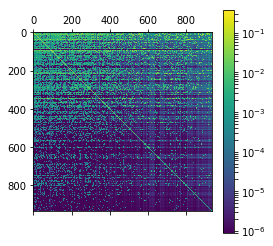

In [6]:
df_tag_tag = pd.read_csv('./model/model-150-new/o_by_o.tsv.gz', index_col=0, sep='\t')
mplot(df_tag_tag)

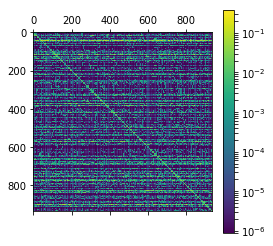

In [7]:
mplot(df_tag_tag, labels)

In [8]:
def compute_ptt(df, z):
    vals = df['Z_{}'.format(z)]
    names = df.index
    X = np.outer(vals.values, vals.values)
    return pd.DataFrame(X, index=names, columns=names)

In [45]:
def draw_fsm(z):
    df_fsm = compute_ptt(df_prob_tag_z, z)
    cols = df_fsm.columns
    rows = df_fsm.index.get_values()
    mplot(df_fsm)
    
    avg = df_fsm.mean()
    std = df_fsm.std()
    uni_prob = 1.0 / df_fsm.shape[1]
    #df_fsm[df_fsm <= avg + 2*std] = 0
    #df_fsm = df_fsm / df_fsm.sum(axis=0)
    #df_fsm.fillna(0)
    #mplot(df_fsm)
    print(df_fsm.values)
    rows_nz, cols_nz = np.nonzero(df_fsm.values)
    print(len(rows))
    dg = Digraph('finite_state_machine')
    dg.attr('node', shape='circle')
    a = 0
    for row, col in zip(rows_nz, cols_nz):
        if (df_fsm.values[row, col] > 5*uni_prob):
            dg.edge(rows[row], cols[col])
    dg.view()

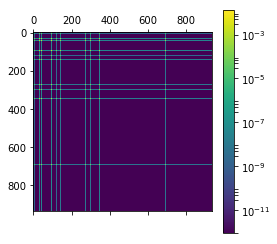

[[  8.75181680e-13   2.53811439e-08   8.75181680e-13 ...,   8.75181680e-13
    8.75181680e-13   8.75181680e-13]
 [  2.53811439e-08   7.36078554e-04   2.53811439e-08 ...,   2.53811439e-08
    2.53811439e-08   2.53811439e-08]
 [  8.75181680e-13   2.53811439e-08   8.75181680e-13 ...,   8.75181680e-13
    8.75181680e-13   8.75181680e-13]
 ..., 
 [  8.75181680e-13   2.53811439e-08   8.75181680e-13 ...,   8.75181680e-13
    8.75181680e-13   8.75181680e-13]
 [  8.75181680e-13   2.53811439e-08   8.75181680e-13 ...,   8.75181680e-13
    8.75181680e-13   8.75181680e-13]
 [  8.75181680e-13   2.53811439e-08   8.75181680e-13 ...,   8.75181680e-13
    8.75181680e-13   8.75181680e-13]]
934


In [46]:
draw_fsm(0)

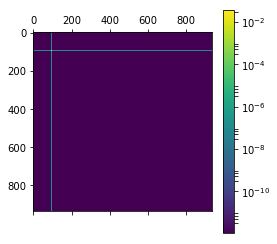

[[  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]
 [  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]
 [  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]
 ..., 
 [  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]
 [  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]
 [  1.01838159e-12   1.01838159e-12   1.01838159e-12 ...,   1.01838159e-12
    1.01838159e-12   1.01838159e-12]]
934


In [47]:
draw_fsm(12)

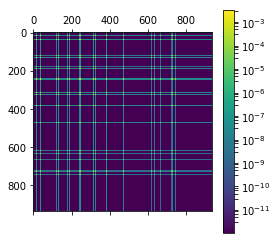

934


In [12]:
draw_fsm(118)